In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv("Data.csv")
df2 = pd.read_csv("NCAP_Funding.csv")
df3 = pd.read_csv("State_data.csv")

In [3]:
for column in df1.columns:
    if df1[column].dtype == "object": 
        df1[column].fillna(df1[column].mode()[0], inplace=True)
    else:  # Numerical column
        df1[column].fillna(df1[column].median(), inplace=True)

for column in df3.columns:
    if df3[column].dtype == "object": 
        df3[column].fillna(df3[column].mode()[0], inplace=True)
    else:  # Numerical column
        df3[column].fillna(df3[column].median(), inplace=True)

df1["Timestamp"] = pd.to_datetime(df1["Timestamp"], format="%Y-%m-%d")

/tmp/ipykernel_4638/600689759.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].fillna(df1[column].mode()[0], inplace=True)
/tmp/ipykernel_4638/600689759.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

# Spatial Aggregation

Question 1 -

In [5]:
highest_state_avg = df1.groupby("state")["PM2.5"].mean().idxmax()
print(f'Highest Average PM2.5 state: {highest_state_avg}')

Highest Average PM2.5 state: Delhi


Question 2 -

In [6]:
df1_2023 = df1[df1["Timestamp"].dt.year == 2023]
hazardous_2023 = df1_2023[df1["PM2.5"] > 300]
max_hazardous_state = hazardous_2023.groupby("state").size().idxmax()

print(f'State with the maximum number of hazardous days: {max_hazardous_state}')

State with the maximum number of hazardous days: Delhi


/tmp/ipykernel_4638/3232626708.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hazardous_2023 = df1_2023[df1["PM2.5"] > 300]


Question 3 -

In [7]:
max_state_variability = df1_2023.groupby('state')["PM2.5"].std().idxmax()

print(f'State with maximum variance in PM2.5 levels: {max_state_variability}')

State with maximum variance in PM2.5 levels: Delhi


Question 4 -

In [8]:
df1_covid = df1[df1["Timestamp"].dt.year.isin([2020,2021])]
min_state_pm25 = df1_covid.groupby('state')['PM2.5'].mean().idxmin()

print(f'State with minimum average PM2.5 levels in the Covid Period: {min_state_pm25}')

State with minimum average PM2.5 levels in the Covid Period: Mizoram


# Temporal Aggregation

Question 1 -

In [10]:
df1_temp = df1[(df1["Timestamp"].dt.year == 2020) & (df1["Timestamp"].dt.month == 8)]
mx = df1_temp.loc[df1_temp["PM2.5"].idxmax(),"station"]

print(mx)

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


Question 2 -

In [11]:
def assign_season(month):
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Summer"
    elif month in [6,7,8,9]:
        return "Monsoon"
    else:
        return "X"

df1_temp = df1[(df1["Timestamp"].dt.year == 2018) & (df1["station"] == mx)]
df1_temp['Season'] = df1_temp["Timestamp"].dt.month.apply(assign_season)

df1_temp_avg = df1_temp.groupby('Season')["PM2.5"].mean()
print(df1_temp_avg)
print()
print(f'Season with highest PM2.5 conc.: {df1_temp_avg.idxmax()}')

Season
Monsoon    40.266135
Summer     42.005990
Winter     50.501441
X          46.135918
Name: PM2.5, dtype: float64

Season with highest PM2.5 conc.: Winter


/tmp/ipykernel_4638/1611043955.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_temp['Season'] = df1_temp["Timestamp"].dt.month.apply(assign_season)


Winter can be the reason for the above since there can be an increase in the use of heaters or biomass burning in colder months or agricultural practices like parali which involves the crop residue burning. Also temperature inversions can trap pollutants close to the ground, leading to higher concentration of PM2.5.

Question 3 -

/tmp/ipykernel_56647/2602637775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_temp['Weekend']  = df1_temp["Timestamp"].dt.dayofweek.isin([5,6])
/tmp/ipykernel_56647/2602637775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_temp['Month'] = df1_temp["Timestamp"].dt.month


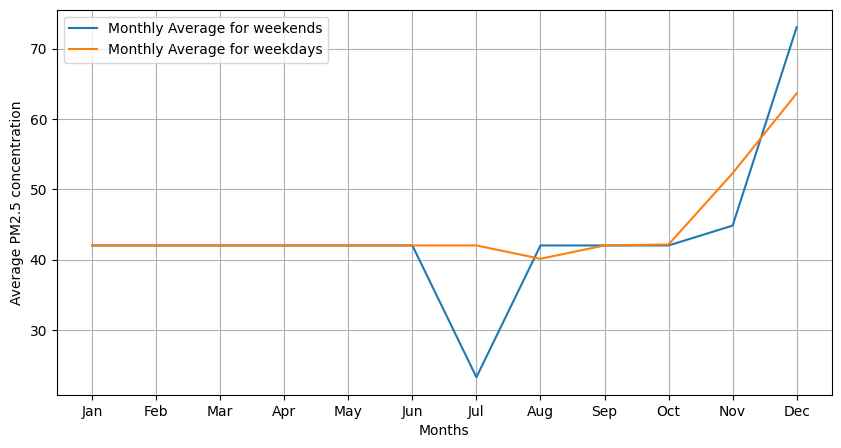

In [73]:
df1_temp['Weekend']  = df1_temp["Timestamp"].dt.dayofweek.isin([5,6])
df1_temp['Month'] = df1_temp["Timestamp"].dt.month
df1_temp_weekday = df1_temp[df1_temp['Weekend'] == False]
df1_temp_weekend = df1_temp[df1_temp['Weekend'] == True]

monthly_avg_weekend = df1_temp_weekend.groupby('Month')["PM2.5"].mean()
monthly_avg_weekday = df1_temp_weekday.groupby('Month')["PM2.5"].mean()

plt.figure(figsize=(10,5))
plt.plot(monthly_avg_weekend,label="Monthly Average for weekends")
plt.plot(monthly_avg_weekday,label="Monthly Average for weekdays")
plt.xlabel("Months")
plt.ylabel("Average PM2.5 concentration")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()

# Spatio-temporal Aggregation

Question 1 -

In [74]:
df1_2022 = df1[df1["Timestamp"].dt.year == 2022]
monsoon = df1_2022[df1["Timestamp"].dt.month.isin([6,7,8,9])].groupby('state')['PM2.5'].mean()
summer = df1_2022[df1["Timestamp"].dt.month.isin([3,4,5])].groupby('state')['PM2.5'].mean()

percentage_change = ((monsoon-summer)/summer)*100
highest_state_perc_change = percentage_change.idxmax()

print(f'The state with highest difference for the year 2022 is - {highest_state_perc_change}')

The state with highest difference for the year 2022 is - Jammu and Kashmir


/tmp/ipykernel_56647/2958804332.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  monsoon = df1_2022[df1["Timestamp"].dt.month.isin([6,7,8,9])].groupby('state')['PM2.5'].mean()
/tmp/ipykernel_56647/2958804332.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  summer = df1_2022[df1["Timestamp"].dt.month.isin([3,4,5])].groupby('state')['PM2.5'].mean()


Question 2 -

/tmp/ipykernel_56647/3308735821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Season'] = delhi_data['Timestamp'].dt.month.apply(assign_season)
/tmp/ipykernel_56647/3308735821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Year'] = delhi_data['Timestamp'].dt.year


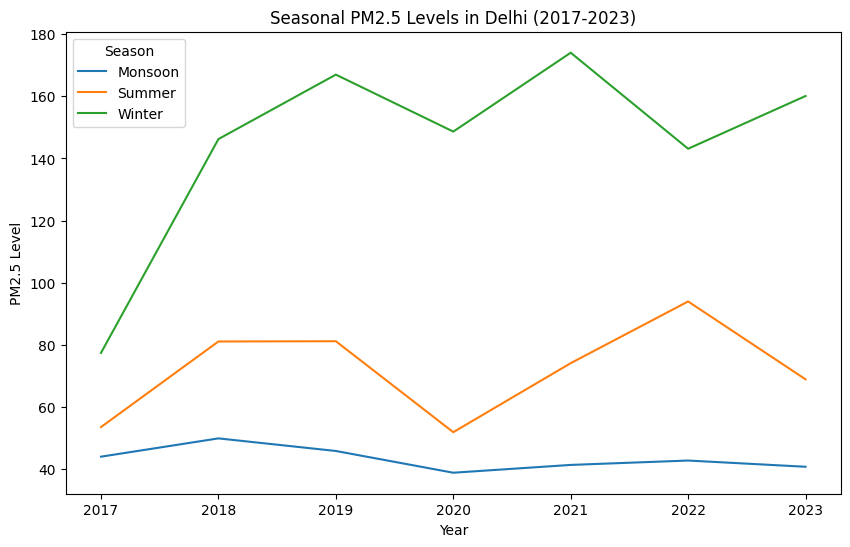

In [75]:
delhi_data = df1[(df1['state'] == "Delhi") & (df1['Timestamp'].dt.year.isin([2017,2018,2019,2020,2021,2022,2023]))]

delhi_data['Season'] = delhi_data['Timestamp'].dt.month.apply(assign_season)
delhi_data['Year'] = delhi_data['Timestamp'].dt.year
seasonal_trend = delhi_data[delhi_data['Season'] != "X"].groupby(["Year","Season"])["PM2.5"].mean()
seasonal_trend = seasonal_trend.to_frame()


plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_trend, x="Year", y="PM2.5", hue="Season")
plt.title("Seasonal PM2.5 Levels in Delhi (2017-2023)")
plt.ylabel("PM2.5 Level")
plt.show()

Question 3 -

/tmp/ipykernel_4638/1395962049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities["Year"] = cities["Timestamp"].dt.year


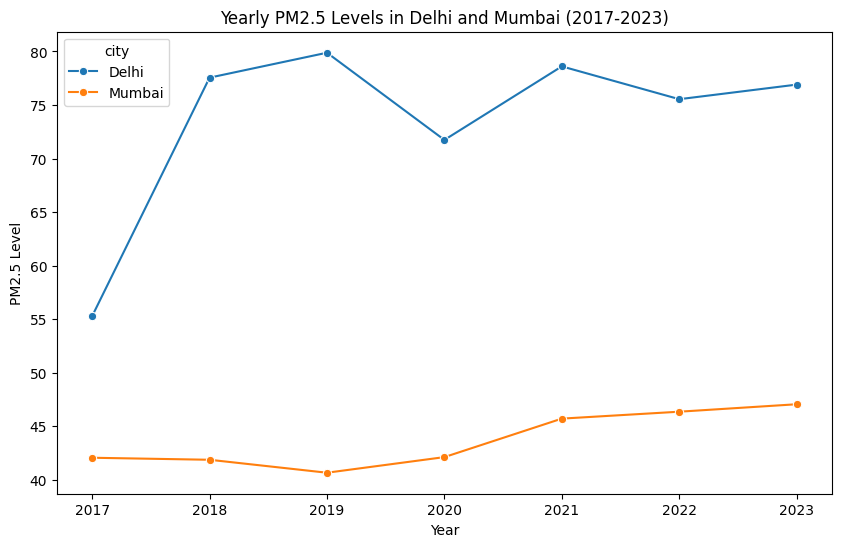

The city with more fluctuations is Delhi


In [16]:
cities = df1[(df1["city"].isin(["Delhi","Mumbai"])) & (df1['Timestamp'].dt.year.isin([2015,2016,2017,2018,2019,2020,2021,2022,2023]))]
cities["Year"] = cities["Timestamp"].dt.year
time_series = cities.groupby(["Year","city"])["PM2.5"].mean()
time_series = time_series.to_frame()

plt.figure(figsize=(10, 6))
sns.lineplot(data=time_series, x="Year", y="PM2.5", hue="city",marker="o")
plt.title("Yearly PM2.5 Levels in Delhi and Mumbai (2017-2023)")
plt.xlabel("Year")
plt.ylabel("PM2.5 Level")
plt.show()

print(f"The city with more fluctuations is {time_series['PM2.5'].idxmax()[1]}")

Here Delhi has the most fluctuations

# Population-Based

Question 1 -

In [18]:
monitoring_stations = df1.groupby('state')["station"].nunique().reset_index()
monitoring_stations.rename(columns={"state":"State"},inplace=True)
df3 = df3.merge(monitoring_stations, on="State", how="left")
df3.rename(columns={"station": "monitoring stations"}, inplace=True)
df3 = df3.drop_duplicates(subset=["monitoring stations"])

print(df3.head())

            State  Population  Area (km2)  monitoring stations
0   Uttar Pradesh   199812341      240928                   57
1     Maharashtra   112374333      307713                  123
2           Bihar   104099452       94163                   36
3     West Bengal    91276115       88752                   22
4  Madhya Pradesh    72626809      308252                   29


In [19]:
df3["Stations per capita"] = df3["monitoring stations"]/df3["Population"]
mx = df3.loc[df3['Stations per capita'].idxmax()]
print(f'The state with the highest number of stations per capita: {mx['State']}')

The state with the highest number of stations per capita: Delhi


Question 2 -

In [20]:
df1_2023 = df1[df1["Timestamp"].dt.year == 2023]
state_avg = df1_2023.groupby('state')["PM2.5"].mean().reset_index()
state_avg.rename(columns={"state":"State"},inplace=True)
df3 = df3.merge(state_avg,on="State",how="left")


print(df3.head())

            State  Population  Area (km2)  monitoring stations  \
0   Uttar Pradesh   199812341      240928                   57   
1     Maharashtra   112374333      307713                  123   
2           Bihar   104099452       94163                   36   
3     West Bengal    91276115       88752                   22   
4  Madhya Pradesh    72626809      308252                   29   

   Stations per capita      PM2.5  
0         2.852677e-07  53.567896  
1         1.094556e-06  44.178242  
2         3.458231e-07  76.239869  
3         2.410269e-07  47.882673  
4         3.993016e-07  45.172240  


In [21]:
state_sum = df1_2023.groupby('state')['PM2.5'].sum().reset_index()
state_sum.rename(columns={'state':'State','PM2.5':'Net PM2.5'},inplace=True)
df3 = df3.merge(state_sum,on='State',how='left')

In [22]:
print(df3.head())

            State  Population  Area (km2)  monitoring stations  \
0   Uttar Pradesh   199812341      240928                   57   
1     Maharashtra   112374333      307713                  123   
2           Bihar   104099452       94163                   36   
3     West Bengal    91276115       88752                   22   
4  Madhya Pradesh    72626809      308252                   29   

   Stations per capita      PM2.5     Net PM2.5  
0         2.852677e-07  53.567896  1.114480e+06  
1         1.094556e-06  44.178242  1.886632e+06  
2         3.458231e-07  76.239869  9.461368e+05  
3         2.410269e-07  47.882673  2.621576e+05  
4         3.993016e-07  45.172240  4.616603e+05  


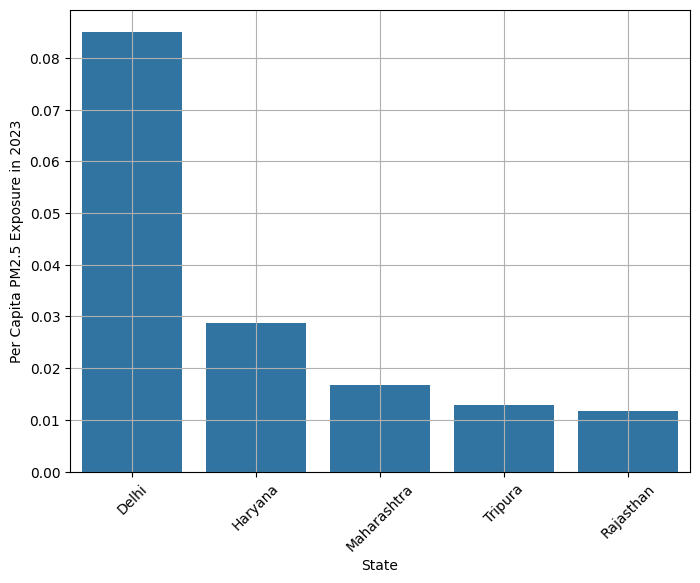

In [23]:
df3["Per Capita PM2.5"] = df3["Net PM2.5"]/df3["Population"]
top_states = df3.nlargest(5,"Per Capita PM2.5")

plt.figure(figsize=(8,6))
sns.barplot(data=top_states,x="State",y="Per Capita PM2.5")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure in 2023")
plt.grid(True)
plt.show()

Question 3 -

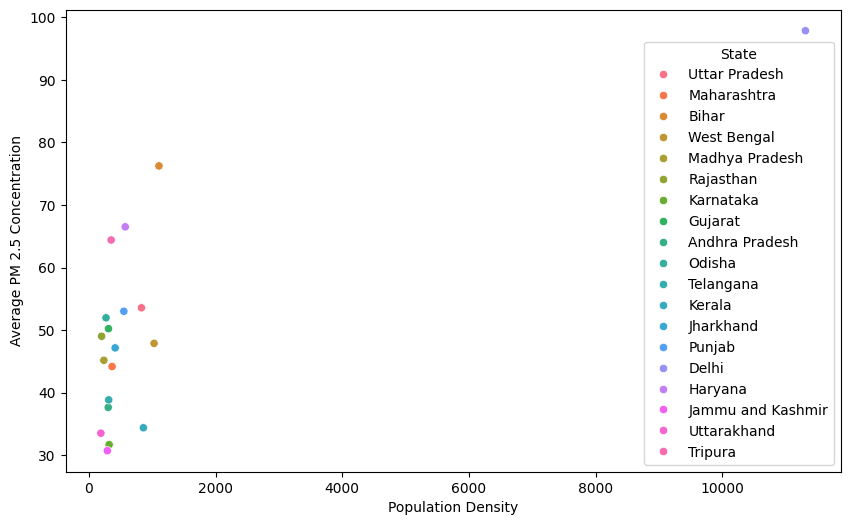

In [24]:
df3["Population Density"] = df3["Population"]/df3["Area (km2)"]

plt.figure(figsize=(10,6))
sns.scatterplot(x=df3["Population Density"],y=df3["PM2.5"],hue=df3["State"])
plt.xlabel("Population Density")
plt.ylabel("Average PM 2.5 Concentration")
plt.show()

As population density tends to increase, average pm2.5 concentration also increases (For most states, not for all)

# Area Based

Question 1 - 

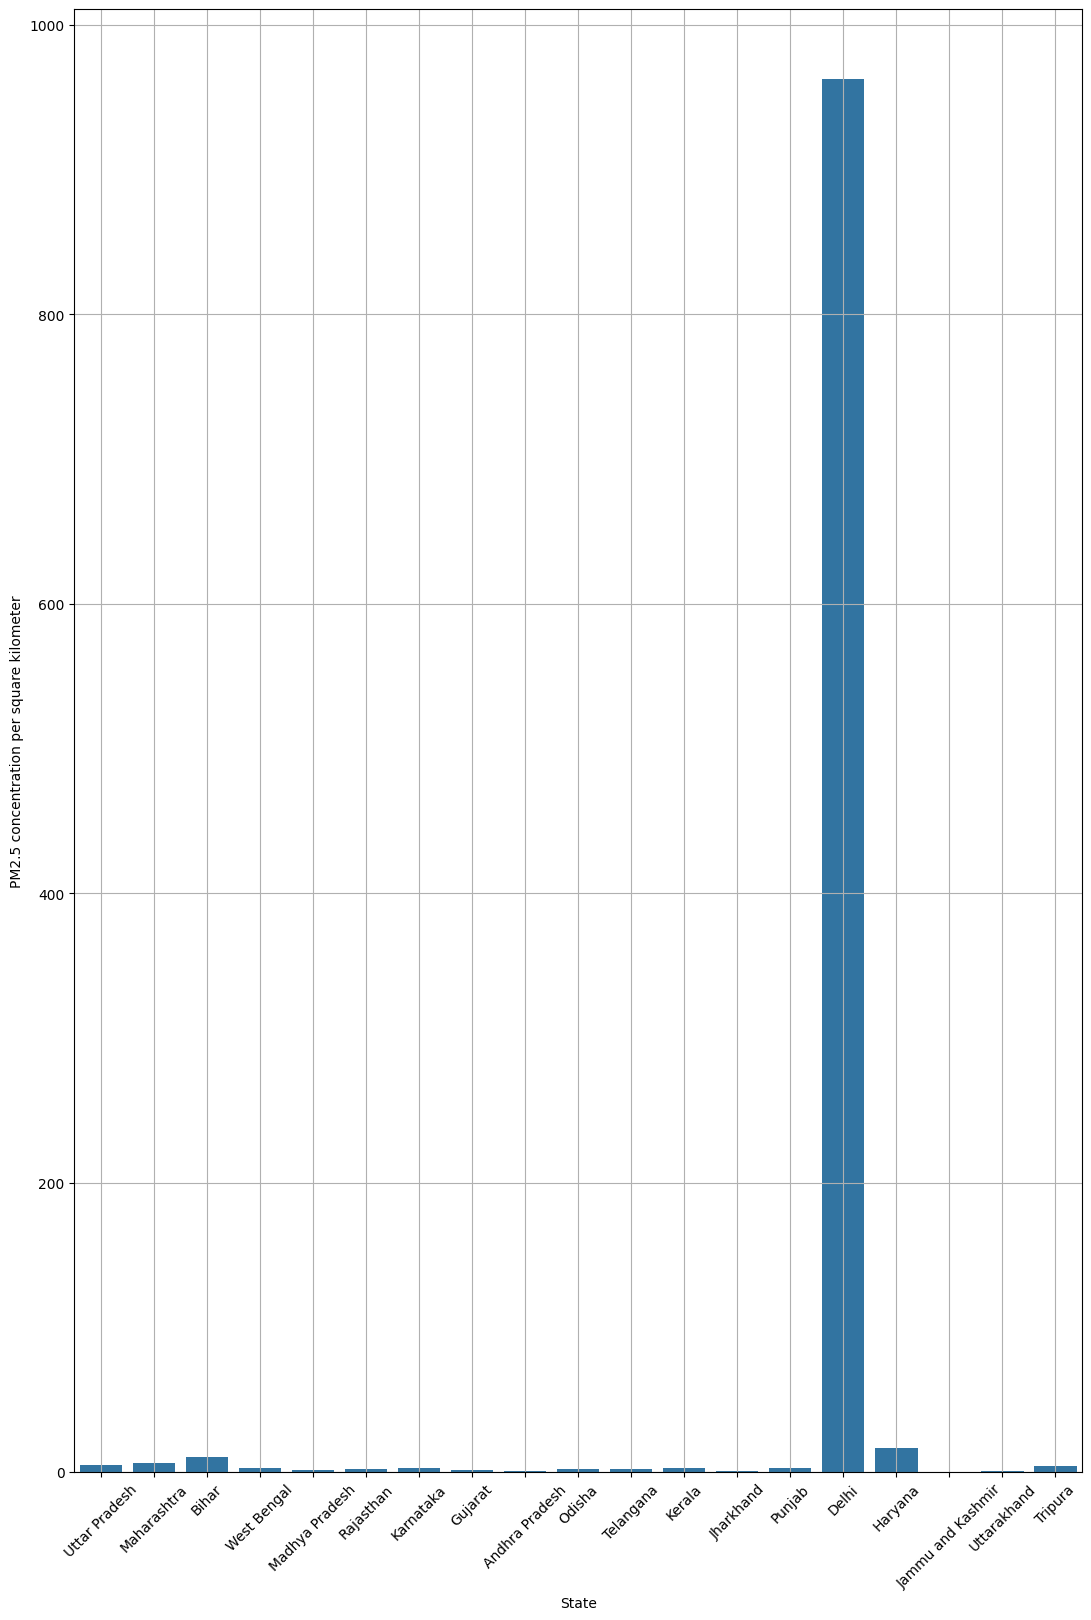

The state with the highesst PM2.5 conc. per square km is: Delhi


In [26]:
df3["PM2.5 concentration per square kilometer"] = df3["Net PM2.5"]/df3["Area (km2)"]

plt.figure(figsize=(13,19))
sns.barplot(x=df3["State"],y=df3["PM2.5 concentration per square kilometer"])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("PM2.5 concentration per square kilometer")
plt.grid(True)
plt.show()

print(f"The state with the highesst PM2.5 conc. per square km is: {df3.loc[df3["PM2.5 concentration per square kilometer"].idxmax(),'State']}")

Question 2 -

The state with the highest number of monitoring stations per square kilometer is - Delhi


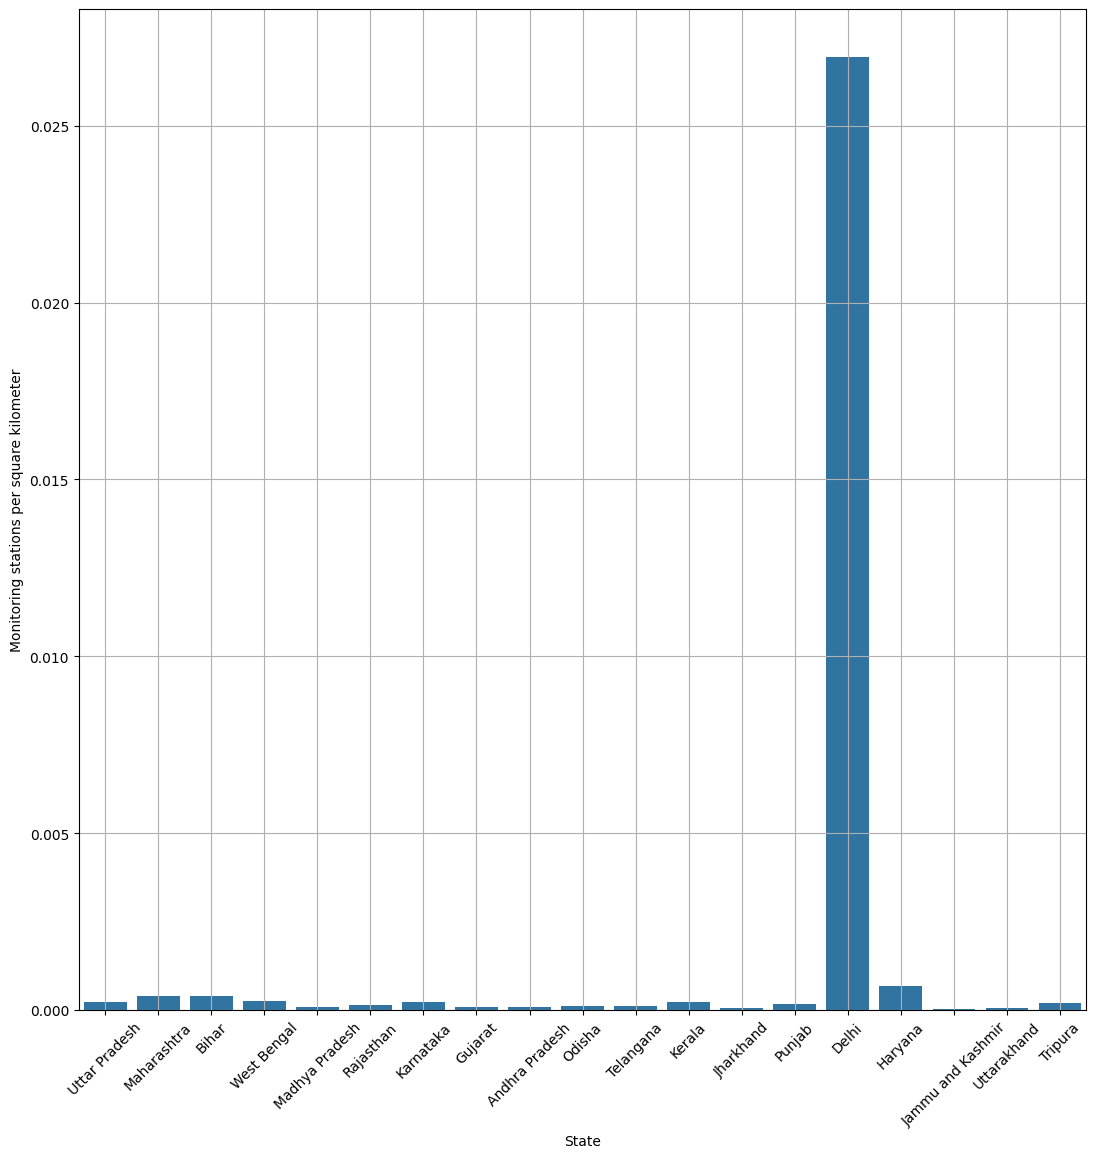

In [27]:
df3["Monitoring stations per square kilometer"] = df3["monitoring stations"]/df3["Area (km2)"]
mx = df3.loc[df3["Monitoring stations per square kilometer"].idxmax()]
print(f'The state with the highest number of monitoring stations per square kilometer is - {mx['State']}')


plt.figure(figsize=(13,13))
sns.barplot(x=df3["State"],y=df3["Monitoring stations per square kilometer"])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Monitoring stations per square kilometer")
plt.grid(True)
plt.show()

Question 3 -

In [91]:
filt_df = df1[(df1['state'].isin(["Maharashtra","Madhya Pradesh"])) & (df1['Timestamp'].dt.year == 2021)]
data = filt_df.groupby('state')['PM2.5'].mean()

print(data)
mh = df3.loc[df3['State'] == "Maharashtra"]
mp = df3.loc[df3['State'] == "Madhya Pradesh"]
print(f"The population density of Maharashtra is - {mh['Population Density']} and that of MP is - {mp['Population Density']}")

state
Madhya Pradesh    44.675481
Maharashtra       43.291923
Name: PM2.5, dtype: float64
The population density of Maharashtra is - 1    365.192023
Name: Population Density, dtype: float64 and that of MP is - 4    235.608557
Name: Population Density, dtype: float64


In this case, the state with lesser population density has more PM2.5 conc. level somehow. This could indicate other sources of pollution (industries, storms, poor air circulation or the bhopal disaster) instead of just population density.

# Funding Based

Question 1 -

In [28]:
df1["Year"] = df1['Timestamp'].dt.year 
df_selected = df2[['State', 'Amount released during FY 2021-22','Total fund released']]
df1.rename(columns={'state':'State'},inplace=True)

df1 = df1.merge(df_selected,on='State',how='left')

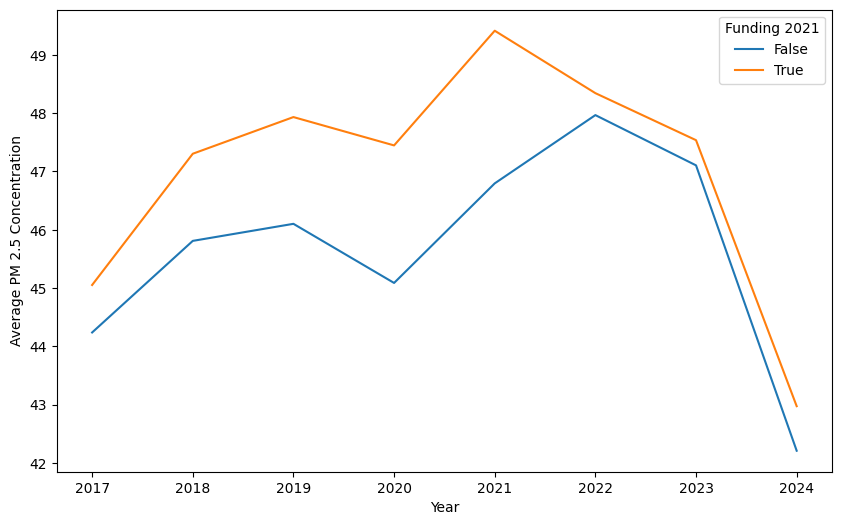

Index(['S. No.', 'State', 'City', 'Amount released during FY 2019-20',
       'Amount released during FY 2020-21',
       'Amount released during FY 2021-22', 'Total fund released',
       'Utilisation as on June 2022'],
      dtype='object')


In [29]:
df1['Funding 2021'] = df1['Amount released during FY 2021-22'] == '-' 
df_selected = df1.groupby(['Year','Funding 2021'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x=df_selected["Year"],y=df_selected["PM2.5"],hue=df_selected["Funding 2021"])
plt.xlabel("Year")
plt.ylabel("Average PM 2.5 Concentration")
plt.show()

print(df2.columns)

The states who got the funding in 2021 had more PM2.5 concentration throughout.

Question 2 -

In [30]:
state = "Assam"

state_df = df1[(df1['Timestamp'].dt.year.isin([2019, 2020, 2021])) & (df1['State'] == state)].copy()
state_df['Year'] = state_df['Timestamp'].dt.year
state_data = state_df.groupby('Year')['PM2.5'].mean().reset_index()

df2["Amount released during FY 2019-20"] = df2["Amount released during FY 2019-20"].replace("-", 0).astype(float)
df2["Amount released during FY 2020-21"] = df2["Amount released during FY 2020-21"].replace("-", 0).astype(float)
df2["Amount released during FY 2021-22"] = df2["Amount released during FY 2021-22"].replace("-", 0).astype(float)

state_dt = df2.groupby('State').agg({
    "Amount released during FY 2019-20": 'sum',
    "Amount released during FY 2020-21": 'sum',
    "Amount released during FY 2021-22": 'sum'
}).reset_index()

state_funding = state_dt[state_dt['State'] == state].copy()

state_funding = state_funding.rename(columns={
    "Amount released during FY 2019-20": 2019,
    "Amount released during FY 2020-21": 2020,
    "Amount released during FY 2021-22": 2021
})

state_funding = state_funding.melt(id_vars=["State"], var_name="Year", value_name="Funding")
print(state_funding)

   State  Year  Funding
0  Assam  2019     0.36
1  Assam  2020    12.00
2  Assam  2021     0.00


In [31]:
merged_data = pd.merge(state_data, state_funding, on="Year", how="left")
print(merged_data.isnull().sum())

print(merged_data)

Year       0
PM2.5      0
State      0
Funding    0
dtype: int64
   Year      PM2.5  State  Funding
0  2019  43.340913  Assam     0.36
1  2020  44.239468  Assam    12.00
2  2021  46.074571  Assam     0.00


In [32]:
df1.columns

Index(['Timestamp', 'station', 'PM2.5', 'PM10', 'address', 'city', 'latitude',
       'longitude', 'State', 'Year', 'Amount released during FY 2021-22',
       'Total fund released', 'Funding 2021'],
      dtype='object')

Index(['Year', 'PM2.5', 'State', 'Funding'], dtype='object')


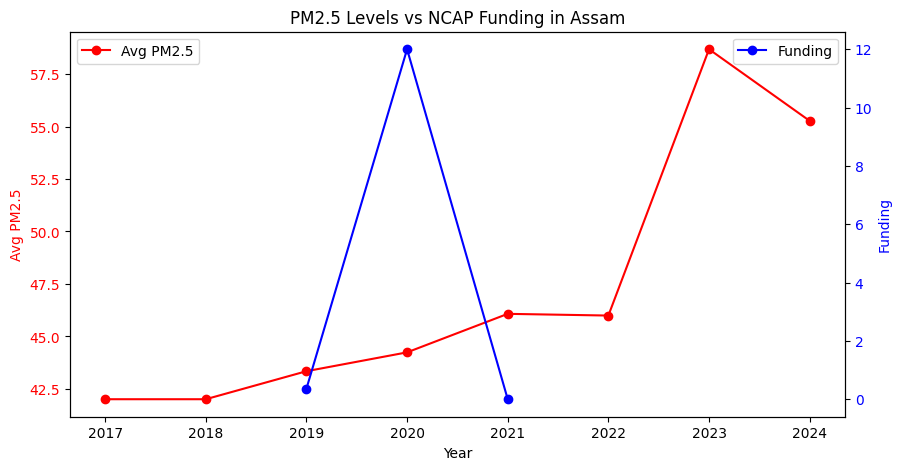

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 5))
print(merged_data.columns)
df1_state = df1.groupby(['Year','State'])['PM2.5'].mean().reset_index()
df1_state = df1_state[df1_state['State'] == state]
ax1.plot(df1_state["Year"], df1_state["PM2.5"], marker="o", color="red", label="Avg PM2.5")
ax1.set_xlabel("Year")
ax1.set_ylabel("Avg PM2.5", color="red")
ax1.tick_params(axis="y", labelcolor="red")
ax1.set_title(f"PM2.5 Levels vs NCAP Funding in {state}")

ax2 = ax1.twinx()
ax2.plot(merged_data["Year"], merged_data["Funding"], color="blue", marker="o", label="Funding")
ax2.set_ylabel("Funding", color="blue")
ax2.tick_params(axis="y", labelcolor="blue")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()

There was no improvement in air quality due to the 2020 spike in NCAP funding but one thing can be made sure that NCAP funding atleast controlled air quality by a bit since after 2021, air quality just worsened in Assam 

Question 3-

In [34]:
df3 = df3.merge(df2[['State','Total fund released']],on='State',how='left')
print(df3.columns)

Index(['State', 'Population', 'Area (km2)', 'monitoring stations',
       'Stations per capita', 'PM2.5', 'Net PM2.5', 'Per Capita PM2.5',
       'Population Density', 'PM2.5 concentration per square kilometer',
       'Monitoring stations per square kilometer', 'Total fund released'],
      dtype='object')


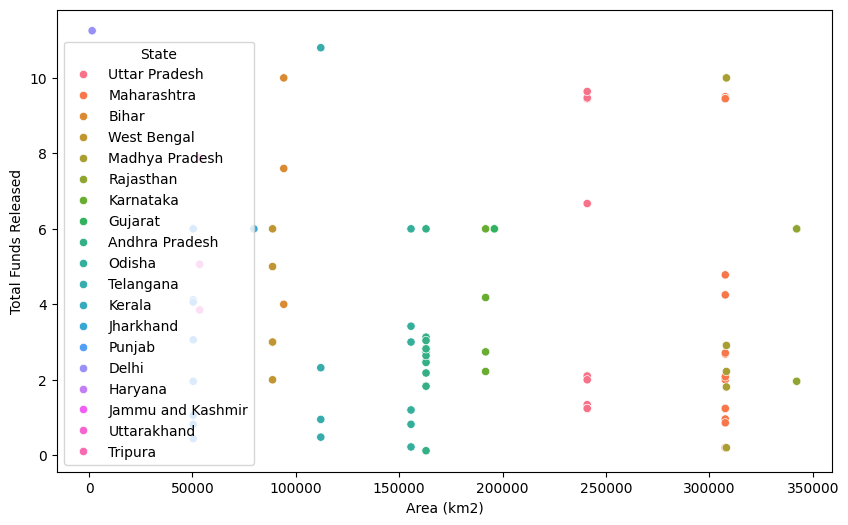

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df3["Area (km2)"],y=df3["Total fund released"],hue=df3["State"])
plt.xlabel("Area (km2)")
plt.ylabel("Total Funds Released")
plt.show()

# Miscelleneaous Questions -

Question 1 -

In [36]:
df1_2023 = df1[df1["Timestamp"].dt.year == 2023]

city = df1_2023.groupby("city")["PM2.5"].mean().idxmax()
city_data = df1_2023[df1_2023["city"] == city]

hazardous_days = (city_data['PM2.5'] > 300).sum()
total_days = city_data['Timestamp'].nunique()

perc = (hazardous_days/total_days)*100
print(f"Percentage of hazardous days in {city} is {perc:.2f}%")

Percentage of hazardous days in Byrnihat is 21.92%


Question 2 -

/tmp/ipykernel_4638/474419745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi["Year"] = df_delhi["Timestamp"].dt.year
/tmp/ipykernel_4638/474419745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi["Month"] = df_delhi["Timestamp"].dt.month
/tmp/ipykernel_4638/474419745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

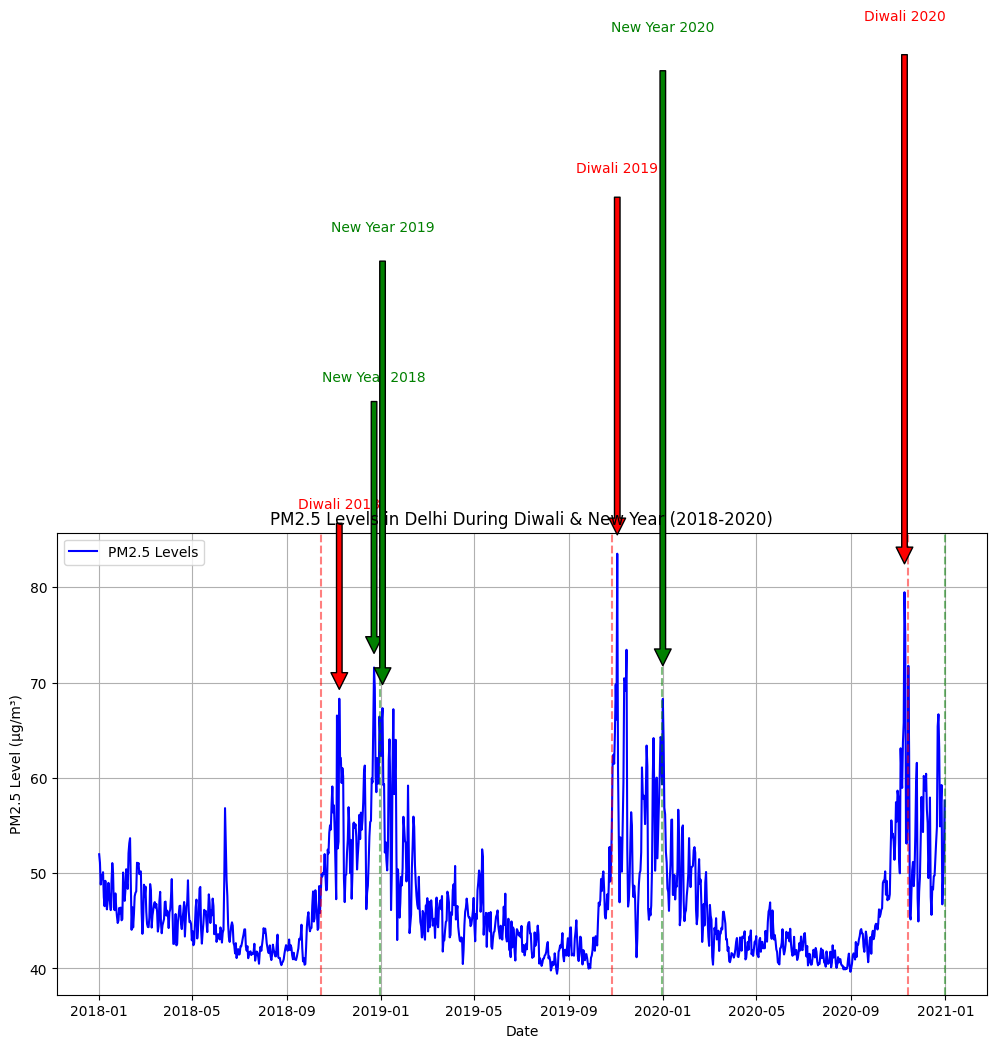

In [37]:
df_delhi = df1[df1["city"] == "Delhi"]
df_delhi["Year"] = df_delhi["Timestamp"].dt.year
df_delhi["Month"] = df_delhi["Timestamp"].dt.month
df_delhi["Day"] = df_delhi["Timestamp"].dt.day
df_delhi = df_delhi[(df_delhi["Year"] >= 2018) & (df_delhi["Year"] <= 2020)]

diwali_months = [10, 11]
new_year_months = [12, 1]

df_delhi["Festival"] = "Regular Months"
df_delhi.loc[df_delhi["Month"].isin(diwali_months), "Festival"] = "Diwali"
df_delhi.loc[df_delhi["Month"].isin(new_year_months), "Festival"] = "New Year"

df_daily = df_delhi.groupby(["Year", "Month", "Day"])["PM2.5"].mean().reset_index()
df_daily["Date"] = pd.to_datetime(df_daily[["Year", "Month", "Day"]])

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_daily["Date"], y=df_daily["PM2.5"], label="PM2.5 Levels", color="b")

offset = 20
heights = []

for year in [2018, 2019, 2020]:
    diwali_spike = df_daily[(df_daily["Year"] == year) & (df_daily["Month"].isin(diwali_months))]["PM2.5"].max()
    new_year_spike = df_daily[(df_daily["Year"] == year) & (df_daily["Month"].isin(new_year_months))]["PM2.5"].max()
    
    diwali_date = df_daily[(df_daily["Year"] == year) & (df_daily["PM2.5"] == diwali_spike)]["Date"].values
    new_year_date = df_daily[(df_daily["Year"] == year) & (df_daily["PM2.5"] == new_year_spike)]["Date"].values
    
    if len(diwali_date) > 0:
        height = diwali_spike + offset + len(heights) * 10
        heights.append(height)
        plt.annotate(f"Diwali {year}", xy=(diwali_date[0], diwali_spike), 
                     xytext=(diwali_date[0], height),
                     ha='center', arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

    if len(new_year_date) > 0:
        height = new_year_spike + offset + len(heights) * 10
        heights.append(height)
        plt.annotate(f"New Year {year}", xy=(new_year_date[0], new_year_spike), 
                     xytext=(new_year_date[0], height),
                     ha='center', arrowprops=dict(facecolor='green', shrink=0.05), fontsize=10, color='green')

plt.axvline(pd.to_datetime("2018-10-15"), color="red", linestyle="--", alpha=0.5)
plt.axvline(pd.to_datetime("2019-10-27"), color="red", linestyle="--", alpha=0.5)
plt.axvline(pd.to_datetime("2020-11-14"), color="red", linestyle="--", alpha=0.5)
plt.axvline(pd.to_datetime("2018-12-31"), color="green", linestyle="--", alpha=0.5)
plt.axvline(pd.to_datetime("2019-12-31"), color="green", linestyle="--", alpha=0.5)
plt.axvline(pd.to_datetime("2020-12-31"), color="green", linestyle="--", alpha=0.5)

plt.title("PM2.5 Levels in Delhi During Diwali & New Year (2018-2020)")
plt.xlabel("Date")
plt.ylabel("PM2.5 Level (µg/m³)")
plt.legend()
plt.grid(True)
plt.show()

The spikes can be observed as above, Diwali and New Year actually cause a spike in PM2.5 levels each year, reason being fireworks and more human activity.

Question 3 -

/tmp/ipykernel_4638/816030488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data["Year"] = state_data["Timestamp"].dt.year


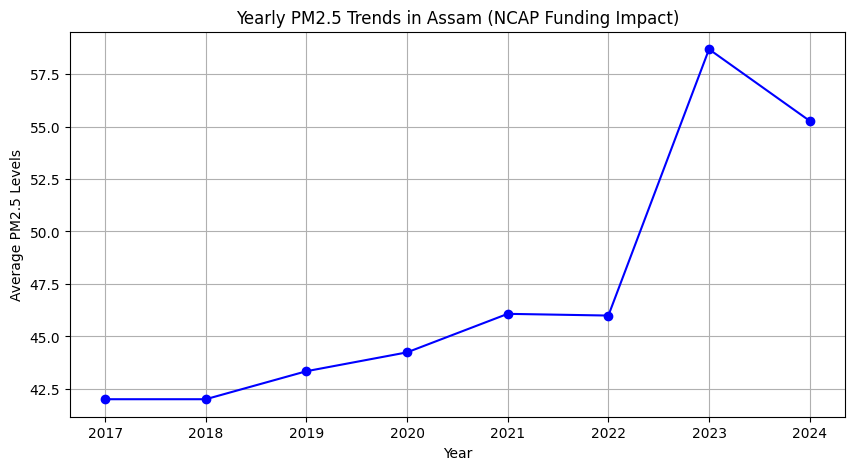

In [39]:
state = df2.loc[df2['Amount released during FY 2020-21'].idxmax(), 'State']
state_data = df1[df1['State'] == state]
state_data["Year"] = state_data["Timestamp"].dt.year

state_data = state_data.groupby('Year')['PM2.5'].mean()
plt.figure(figsize=(10, 5))
plt.plot(state_data.index, state_data.values, marker='o', linestyle='-', color='b')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title(f"Yearly PM2.5 Trends in {state} (NCAP Funding Impact)")
plt.grid(True)
plt.show()

Question 4 -

/usr/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


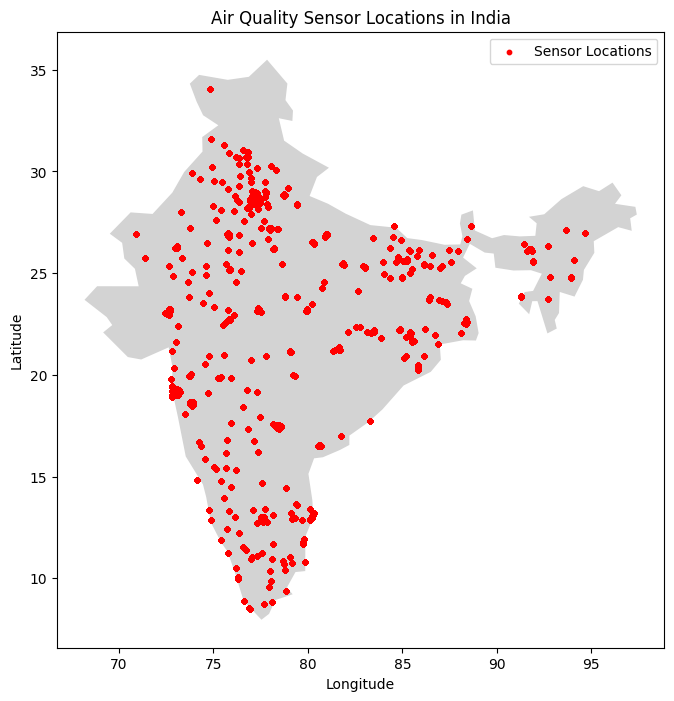

In [63]:
import geopandas as gpd
shapefile_path = "/home/anurag/110m_cultural/ne_110m_admin_0_countries.shp"  # Update this path!

world = gpd.read_file(shapefile_path)
india_map = world[world["ADMIN"] == "India"]

fig, ax = plt.subplots(figsize=(10, 8))
india_map.plot(ax=ax, color='lightgrey')
ax.scatter(df1['longitude'], df1['latitude'], color='red', s=10, label="Sensor Locations")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Air Quality Sensor Locations in India")
plt.legend()
plt.show()

# Tell us something new

In [50]:
funding_cols = ["Amount released during FY 2019-20", "Amount released during FY 2020-21", "Amount released during FY 2021-22"]
df2[funding_cols] = df2[funding_cols].replace("-", 0).astype(float)

df2["Total Funding"] = df2[funding_cols].sum(axis=1)
df_poll = df1.groupby(["State", "Year"])["PM2.5"].mean().reset_index()
df_poll.rename(columns={"PM2.5": "Avg PM2.5"}, inplace=True)
df_funding = df_poll.merge(df2[["State", "Total Funding", "Utilisation as on June 2022"]], on="State", how="left")

df_funding["PM2.5 Reduction"] = df_funding.groupby("State")["Avg PM2.5"].diff(periods=1) * -1
df_funding.dropna(subset=["PM2.5 Reduction"], inplace=True)
df_funding.rename(columns={"Utilisation as on June 2022": "Fund Utilisation"}, inplace=True)

print(df_funding.head())

            State  Year  Avg PM2.5  Total Funding Fund Utilisation  \
1  Andhra Pradesh  2017  42.964187           2.84            22.91   
2  Andhra Pradesh  2017  42.964187           2.18            22.91   
3  Andhra Pradesh  2017  42.964187           2.74            22.91   
4  Andhra Pradesh  2017  42.964187           0.12            22.91   
5  Andhra Pradesh  2017  42.964187           2.49            22.91   

   PM2.5 Reduction  
1             -0.0  
2             -0.0  
3             -0.0  
4             -0.0  
5             -0.0  


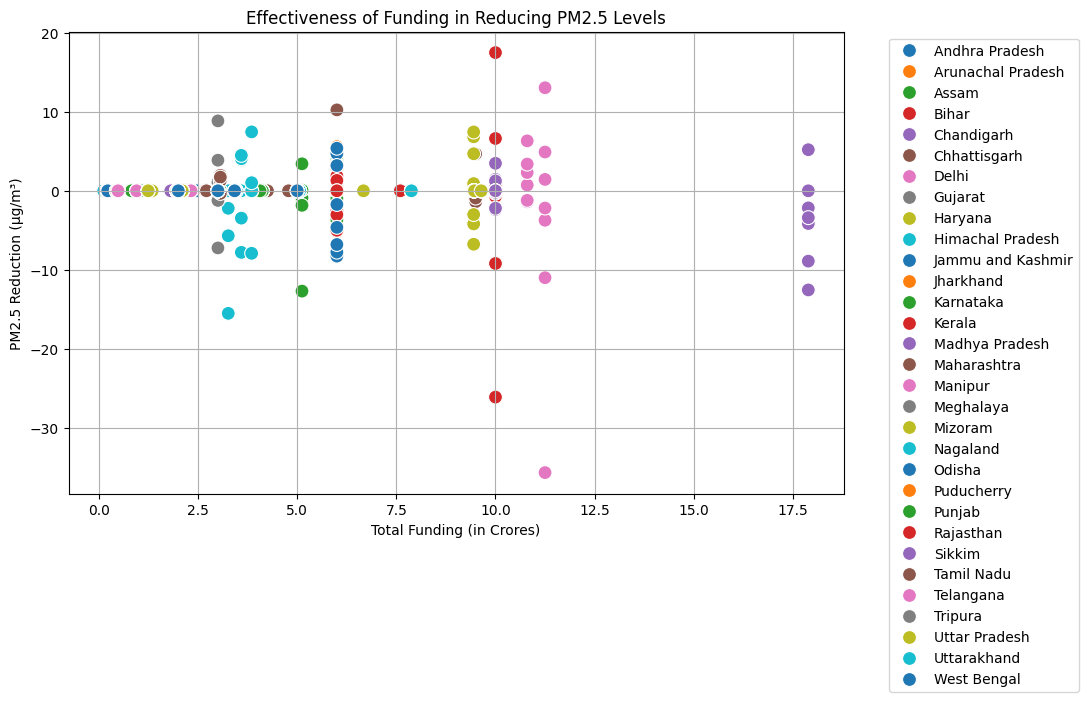

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_funding, x="Total Funding", y="PM2.5 Reduction", hue="State", palette="tab10", s=100)
plt.xlabel("Total Funding (in Crores)")
plt.ylabel("PM2.5 Reduction (µg/m³)")
plt.title("Effectiveness of Funding in Reducing PM2.5 Levels")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

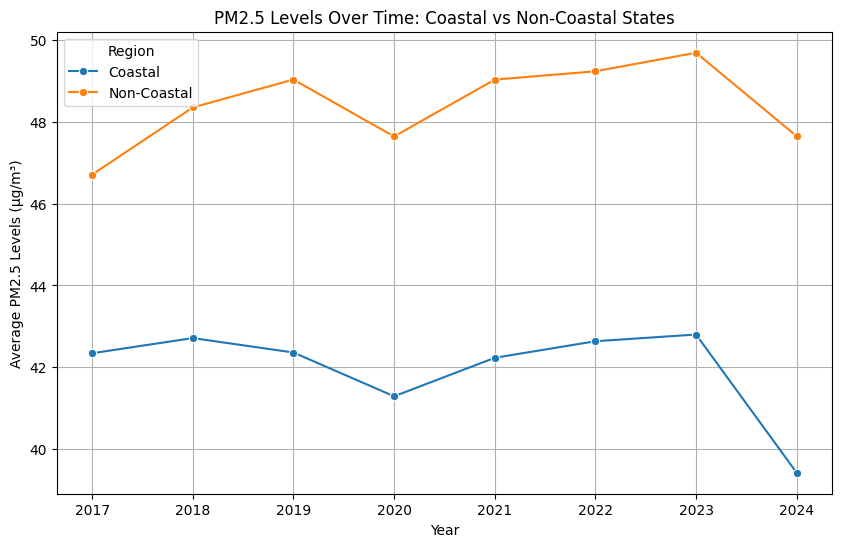

In [54]:
# Define coastal and non-coastal states manually
coastal_states = ["Gujarat", "Maharashtra", "Goa", "Karnataka", "Kerala", "Tamil Nadu", "Andhra Pradesh", "Odisha", "West Bengal"]

# Create a new column categorizing states
df_funding["Region"] = df_funding["State"].apply(lambda x: "Coastal" if x in coastal_states else "Non-Coastal")

# Group by year and region to compute mean PM2.5 levels
df_region = df_funding.groupby(["Year", "Region"])["Avg PM2.5"].mean().reset_index()

# Plot the trend over the years
plt.figure(figsize=(10,6))
sns.lineplot(data=df_region, x="Year", y="Avg PM2.5", hue="Region", marker="o")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.title("PM2.5 Levels Over Time: Coastal vs Non-Coastal States")
plt.legend(title="Region")
plt.grid(True)
plt.show()


In above, we tried to analyze the PM2.5 levels of coastal and non-coastal states. Tells that non-coastal states always had less average PM2.5 concentration levels.

Reasons could be more port based activites in coastal states and more involvement in trade & manufacturing